In [1]:
%matplotlib inline

In [2]:
import pandas as pd

DANE

In [3]:
wolne = ['książka', 'książka', 'książka', 'książka', 'telewizja', 'książka', 'telewizja', 'telewizja', 'książka', 
         'książka', 'telewizja', 'telewizja', 'telewizja', 'książka', 'telewizja', 'telewizja', 'telewizja', 'książka', 
         'książka', 'telewizja']
napój = ['herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'kawa', 'herbata', 'herbata', 
         'herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'herbata', 'herbata', 'herbata', 'kawa']
wyjście = ['teatr', 'teatr', 'kino', 'kino', 'teatr', 'kino', 'kino', 'teatr', 'kino', 'kino', 'kino', 'teatr', 'teatr',
           'teatr', 'kino', 'kino', 'teatr', 'teatr', 'teatr', 'teatr']
po_roku = ['Tak', 'Nie', 'Tak', 'Tak', 'Nie', 'Tak', 'Nie', 'Tak', 'Nie', 'Tak', 'Nie', 'Nie', 'Nie', 'Tak', 'Nie', 
           'Nie', 'Tak', 'Nie', 'Nie', 'Tak']

In [4]:
prenumeratorzy = pd.DataFrame({"wolne" : wolne, "napój": napój, "wyjście": wyjście, "po_roku":po_roku})

In [5]:
prenumeratorzy

,wolne,napój,wyjście,po_roku
0,książka,herbata,teatr,Tak
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
3,książka,herbata,kino,Tak
4,telewizja,kawa,teatr,Nie
5,książka,kawa,kino,Tak
6,telewizja,herbata,kino,Nie
7,telewizja,kawa,teatr,Tak
8,książka,kawa,kino,Nie
9,książka,herbata,kino,Tak


ENTROPIA

-wartość którą chcemy zminimalizować

WYKRES ENTROPII BINARNEJ

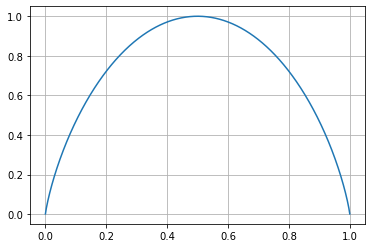

In [7]:
import pylab
import numpy as np

x = np.linspace(0.0001,0.9999,1000) # 1000 punktów
y = -x * np.log2(x) - (1-x) * np.log2(1-x) # wyznaczenie wartości entropii

# wykres
pylab.plot(x,y)
pylab.grid()
pylab.show()

In [8]:
P_Tak = len(prenumeratorzy[prenumeratorzy["po_roku"] == "Tak"]) / len(prenumeratorzy)
P_Nie = len(prenumeratorzy[prenumeratorzy["po_roku"] == "Nie"]) / len(prenumeratorzy)

In [9]:
P_Tak, P_Nie

(0.45, 0.55)

In [10]:
H_całość = -P_Tak * np.log2(P_Tak) - P_Nie * np.log2(P_Nie)

In [11]:
H_całość

0.9927744539878083

Podział po czasie wonym

In [12]:
prenumeratorzy_książka = prenumeratorzy[prenumeratorzy["wolne"] == "książka"]
prenumeratorzy_telewizja = prenumeratorzy[prenumeratorzy["wolne"] == "telewizja"]

In [13]:
P_Tak_książka = len(prenumeratorzy_książka[prenumeratorzy_książka["po_roku"] == "Tak"]) / len(prenumeratorzy_książka)
P_Nie_książka = len(prenumeratorzy_książka[prenumeratorzy_książka["po_roku"] == "Nie"]) / len(prenumeratorzy_książka)
H_książka = -P_Tak_książka * np.log2(P_Tak_książka) - P_Nie_książka * np.log2(P_Nie_książka)

In [14]:
H_książka

0.9709505944546686

ENTROPIA JAKO FUNKCJA

In [15]:
def obliczenie_entropii(data_frame):
    p_tak = len(data_frame[data_frame["po_roku"] == "Tak"]) / len(data_frame)
    p_nie = 1 - p_tak
    H = -p_tak * np.log2(p_tak) - p_nie * np.log2(p_nie)
    return H

In [16]:
H_telewizja = obliczenie_entropii(prenumeratorzy_telewizja)

In [17]:
H_telewizja

0.8812908992306927

PODZIAŁ PO NAPOJACH

In [18]:
prenumeratorzy_kawa = prenumeratorzy[prenumeratorzy["napój"] == "kawa"]
prenumeratorzy_herbata = prenumeratorzy[prenumeratorzy["napój"] == "herbata"]

In [19]:
H_kawa = obliczenie_entropii(prenumeratorzy_kawa)
H_herbata = obliczenie_entropii(prenumeratorzy_herbata)

In [20]:
H_kawa, H_herbata

(1.0, 0.9709505944546686)